# Spectral Method for SBM

**Authors**: Haaris Khan

Let's code the Spectral Method for Approximate Recovery in a stochastic block model. Before we begin, let's setup our notebook.

In [0]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.generators.community import planted_partition_graph

## The Algorithm

We wrap the algorithm in the class StochasticBlockModel. Some nice things to note:

- The NetworkX package implements various tooling for manipulating graphs in Python. In particular, they have conveniently implemented a planted-partition graph generator.
- We use numpy to implement the top eigenvector rounding and various visualizations of the graph. 

Let's take a look at the code.

In [0]:
class StochasticBlockModel():
    """ A class to recover the parititions in a Stochastic Block Model. """

    def __init__(self, n, p, q):
        self.num_groups = 2
        self.n = n
        self.p = p
        self.q = q
        self.graph = planted_partition_graph(self.num_groups, self.n // 2, self.p, self.q)
        self.adj = nx.to_numpy_matrix(self.graph)
        self.J = np.ones((self.n, self.n))
        self.a, self.b = self.n * self.p / 2, self.n * self.q / 2
        
    def visualize(self, node_color='r'):
        """ Visualize the current model's graph. """
        plt.figure(figsize=(15, 12))
        nx.draw_networkx(self.graph, node_color=node_color, width=0.5)

    def is_recoverable(self):
        """ Returns true if the parititon is recoverable.
        
        Recall that the partition is recoverable if the expected in-community 
        degree is greater than the expected cross-community degree by a factor 
        of O(sqrt(n)).
        """
        return (self.a - self.b) > 2 * np.sqrt(np.log(self.n)) * np.sqrt(self.a + self.b)

    def find_partition(self):
        """ 
          Finds partition based on the eigenvector of the largest eigenvalue
          of A - (p + q)/2 * J
        """
        if not self.is_recoverable():
            raise Exception("a - b is not sufficiently large")
            
        X = self.adj - 0.5 * (self.p + self.q) * self.J
        
        eigenvalues, eigenvectors = np.linalg.eig(X)

        # Split the top eigenvector element-wise based on its sign
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:,idx]
        largest = eigenvectors[:, 0]
        return largest

The key idea behind the spectral algorithm for recovering the partition is that the top eigenvector of $M = A - \frac{1}{2} (p + q) J$ is very close to $\mathbb{E}[M]$ which is exactly the indicator +/-1 indicator vector on the partitions. However, this algorithm is approximate and may contain a small fraction of errors.

## Running the Code

Let's try to see what happens when we create a Stochastic Block Model with `p=0.9` and `q=0.1`.

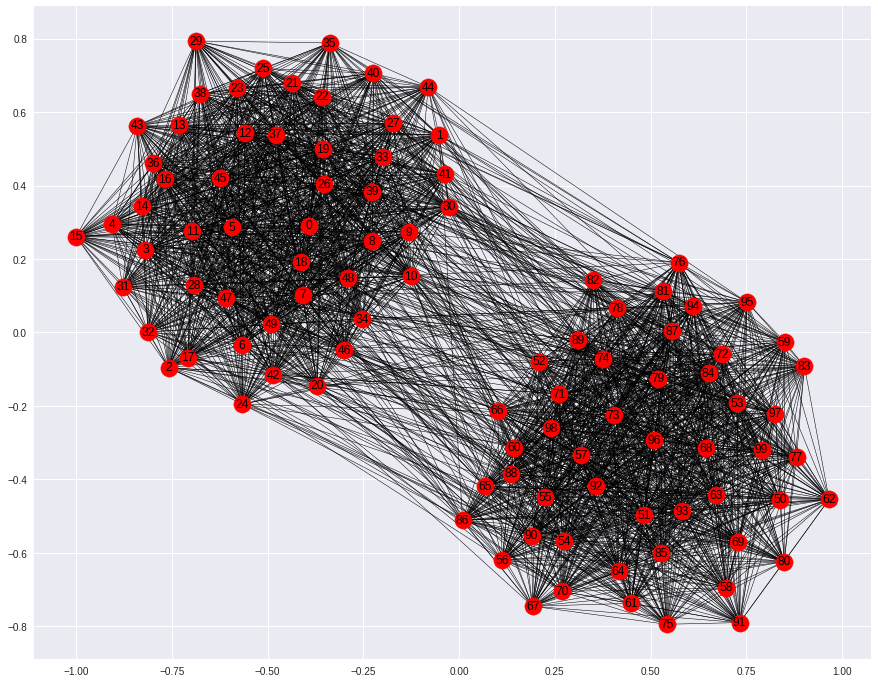

In [0]:
sbm = StochasticBlockModel(100, 0.9, 0.1)
sbm.visualize()

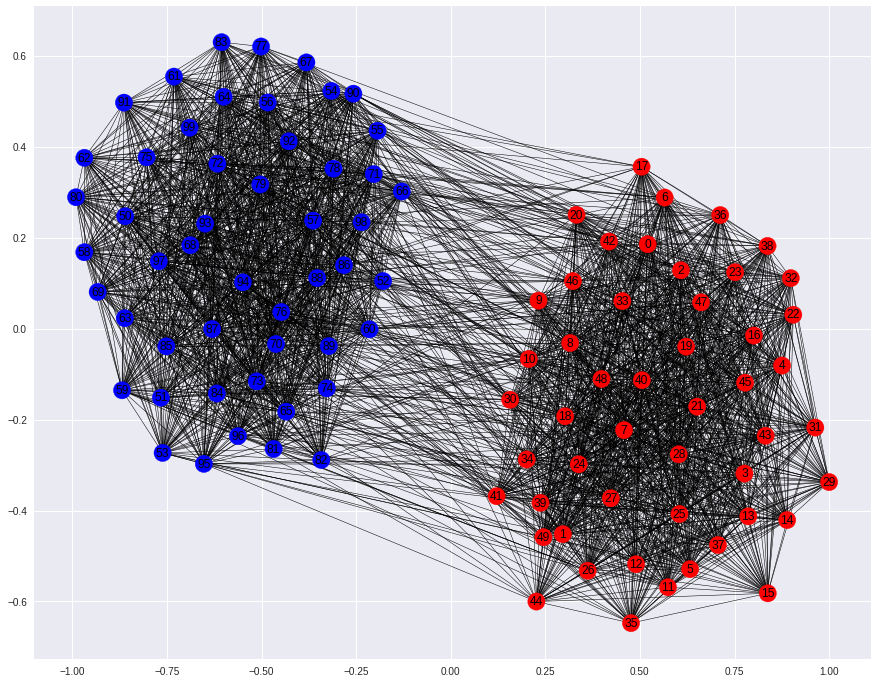

In [0]:
# Recover the partitions
indicator = sbm.find_partition()

# Create the cut vector that will color the two communities different colors
cut = ['red' if i >= 0 else 'blue' for i in indicator]

# Visualize the graph
sbm.visualize(node_color=cut)